# Full Pipeline

In [1]:
import sys
sys.path.append('../script/')
from prepare_data import DataPreparationTrain
from results_visualisation import ResultsEvaluation, ResultsVisualisation

import ultralytics
ultralytics.checks()
from ultralytics import YOLO

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0 CPU (Apple M1)
Setup complete ✅ (8 CPUs, 8.0 GB RAM, 234.9/460.4 GB disk)


## Data preparation

In [2]:
images_path = '../data/all_images/'
annotation_path = "../data/train_annotation/"
annotation_filename = "_annotation.csv"
data = DataPreparationTrain(images_path, annotation_path, annotation_filename, (640,640))
data.import_annotation()
data.get_image_original_size()
data.scaling()
data.preparing_data_for_YOLO()
data.im_original_size

,0,1
794099712.jpg,768,1024
107347968.jpg,782,1280
575078400.jpg,194,259
599261184.jpg,768,1024
51642368.jpg,850,1280
...,...,...
763822080.jpg,425,640
19333120.jpg,351,850
111345664.jpg,348,492
1050017792.jpg,480,640


In [3]:
data.annotation_completed

,im_name,class,x_min,y_min,x_max,y_max,models,x_mid,y_mid,w,h
0,1000407040.jpg,1,11.200000,66.560000,627.200000,576.000000,Toyota Sequoia SUV 2012,0.498750,0.502000,0.962500,0.796000
1,1000472576.jpg,1,30.052174,122.469136,577.669565,588.641975,Toyota Sequoia SUV 2012,0.474783,0.555556,0.855652,0.728395
2,1000669184.jpg,1,7.680000,125.968254,638.720000,581.079365,Toyota Sequoia SUV 2012,0.505000,0.552381,0.986000,0.711111
3,1000800256.jpg,1,87.040000,43.389831,576.000000,602.033898,Toyota Sequoia SUV 2012,0.518000,0.504237,0.764000,0.872881
4,1001324544.jpg,1,44.000000,99.555556,544.000000,522.666667,Toyota Sequoia SUV 2012,0.459375,0.486111,0.781250,0.661111
...,...,...,...,...,...,...,...,...,...,...,...
2340,993853440.jpg,1,33.750000,75.900439,571.875000,453.528551,Suzuki SX4 Sedan 2012,0.473145,0.413616,0.840820,0.590044
2341,994246656.jpg,1,36.800000,135.466667,540.000000,513.066667,Suzuki SX4 Sedan 2012,0.450625,0.506667,0.786250,0.590000
2342,999489536.jpg,1,50.000000,185.534407,587.500000,546.295754,Toyota Sequoia SUV 2012,0.498047,0.571742,0.839844,0.563690
2343,999686144.jpg,1,82.133333,244.184615,563.200000,584.861538,Toyota Sequoia SUV 2012,0.504167,0.647692,0.751667,0.532308


In [4]:
data.download_data_for_training("../data/data_YOLO")

## Prédiction avec le modèle entrainé sur google colab

In [5]:
path_weights = "../trained_models/weights2/best.pt"
model = YOLO(path_weights)

In [6]:
path_images_test = "../data/data_YOLO/val/images/"
results=model.predict(source=path_images_test,conf=0.25, save = True, project = "../logs")


image 1/420 /Users/damidoum/Desktop/Data_challenge/notebooks/../data/data_YOLO/val/images/1000407040.jpg: 640x640 1 Car, 185.1ms
image 2/420 /Users/damidoum/Desktop/Data_challenge/notebooks/../data/data_YOLO/val/images/1005518848.jpg: 640x640 1 Car, 177.0ms
image 3/420 /Users/damidoum/Desktop/Data_challenge/notebooks/../data/data_YOLO/val/images/1005715456.jpg: 640x640 1 Car, 263.6ms
image 4/420 /Users/damidoum/Desktop/Data_challenge/notebooks/../data/data_YOLO/val/images/1006626.jpg: 640x640 (no detections), 178.0ms
image 5/420 /Users/damidoum/Desktop/Data_challenge/notebooks/../data/data_YOLO/val/images/1010040832.jpg: 640x640 1 Car, 221.9ms
image 6/420 /Users/damidoum/Desktop/Data_challenge/notebooks/../data/data_YOLO/val/images/1010237440.jpg: 640x640 2 Cars, 248.5ms
image 7/420 /Users/damidoum/Desktop/Data_challenge/notebooks/../data/data_YOLO/val/images/1011875840.jpg: 640x640 1 Car, 195.7ms
image 8/420 /Users/damidoum/Desktop/Data_challenge/notebooks/../data/data_YOLO/val/image

## Visualisation des résultats

In [7]:
results_visualisation = ResultsVisualisation(results)

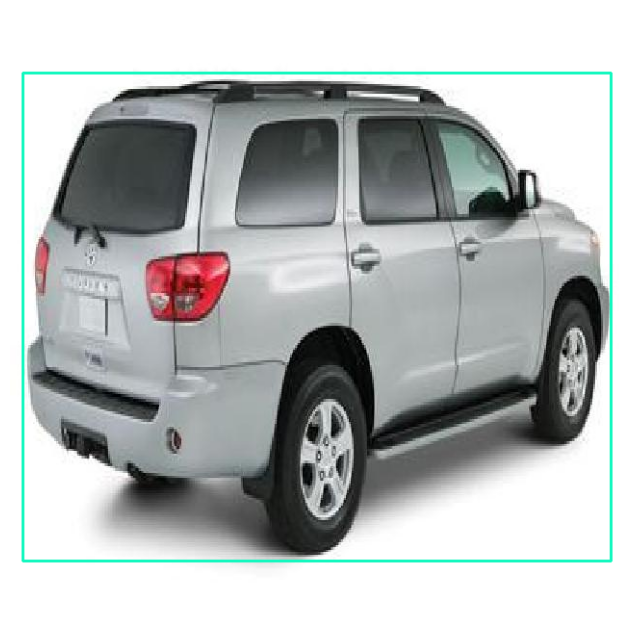

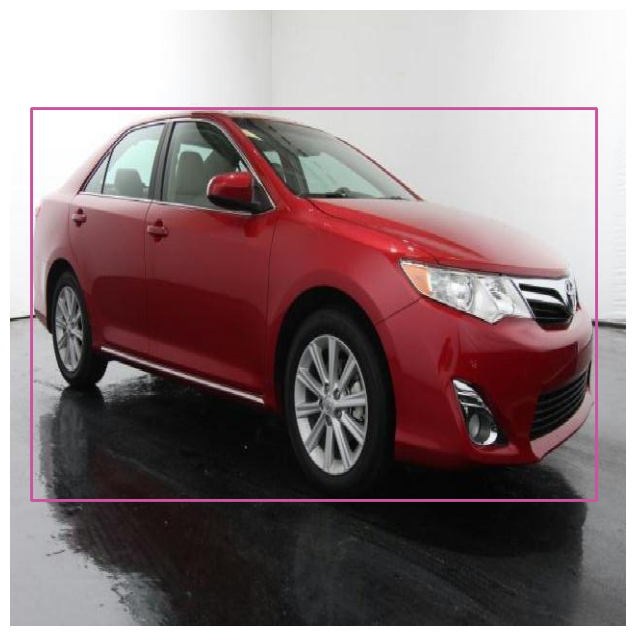

In [8]:
results_visualisation.visualize_predictions([0,1,3])

In [9]:
eval = ResultsEvaluation(results)

In [10]:
df_results = eval.get_results(data.annotation_completed)
df_results

,class,x1,y1,x2,y2,pred,pred_x1,pred_y1,pred_x2,pred_y2,im_name,IoU
0,1.0,11.200000,66.560000,627.200000,576.000000,1.0,13.976990,65.115479,624.171997,572.776550,1000407040.jpg,0.981552
1,1.0,24.000000,104.000000,608.000000,505.333333,1.0,22.157471,102.979492,609.810669,509.091553,1005518848.jpg,0.982090
2,1.0,52.622222,50.962963,596.622222,580.740741,1.0,56.130188,48.483582,593.528687,577.868774,1005715456.jpg,0.977988
3,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1006626.jpg,1.000000
4,1.0,69.000000,256.000000,587.000000,605.333333,1.0,68.784668,255.128113,588.369690,611.307983,1010040832.jpg,0.977786
...,...,...,...,...,...,...,...,...,...,...,...,...
415,1.0,89.000000,192.000000,562.000000,505.600000,1.0,81.406006,188.508972,564.674805,520.550110,978452480.jpg,0.924393
416,1.0,29.460317,48.761905,594.285714,577.523810,1.0,27.943726,47.133240,595.622314,578.029907,979435520.jpg,0.990973
417,1.0,44.800000,146.133333,613.600000,472.533333,1.0,46.538025,145.386292,613.193481,484.135254,980418560.jpg,0.960044
418,1.0,54.011561,208.539326,540.115607,559.871589,1.0,54.551529,204.777222,538.866821,567.191528,981401600.jpg,0.965963


<Axes: >

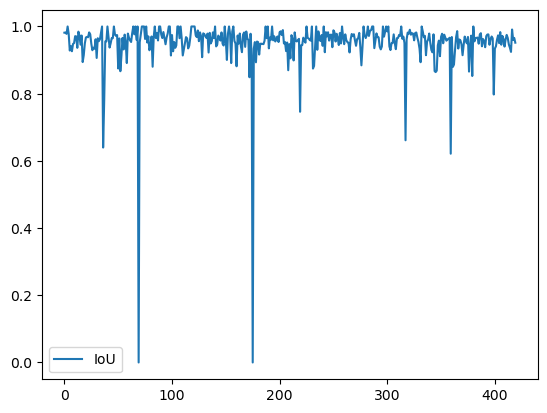

In [11]:
df_results.plot(y = "IoU")

In [12]:
df_results["IoU"].mean()

0.9511824141553122

In [13]:
df_results

,class,x1,y1,x2,y2,pred,pred_x1,pred_y1,pred_x2,pred_y2,im_name,IoU
0,1.0,11.200000,66.560000,627.200000,576.000000,1.0,13.976990,65.115479,624.171997,572.776550,1000407040.jpg,0.981552
1,1.0,24.000000,104.000000,608.000000,505.333333,1.0,22.157471,102.979492,609.810669,509.091553,1005518848.jpg,0.982090
2,1.0,52.622222,50.962963,596.622222,580.740741,1.0,56.130188,48.483582,593.528687,577.868774,1005715456.jpg,0.977988
3,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1006626.jpg,1.000000
4,1.0,69.000000,256.000000,587.000000,605.333333,1.0,68.784668,255.128113,588.369690,611.307983,1010040832.jpg,0.977786
...,...,...,...,...,...,...,...,...,...,...,...,...
415,1.0,89.000000,192.000000,562.000000,505.600000,1.0,81.406006,188.508972,564.674805,520.550110,978452480.jpg,0.924393
416,1.0,29.460317,48.761905,594.285714,577.523810,1.0,27.943726,47.133240,595.622314,578.029907,979435520.jpg,0.990973
417,1.0,44.800000,146.133333,613.600000,472.533333,1.0,46.538025,145.386292,613.193481,484.135254,980418560.jpg,0.960044
418,1.0,54.011561,208.539326,540.115607,559.871589,1.0,54.551529,204.777222,538.866821,567.191528,981401600.jpg,0.965963
